# Logistic Regression

Logistic Regression is a statistical model used for binary classification problems. It estimates the probability that an instance belongs to a particular class.

**Typical Use Cases:**
- Predicting whether an email is spam or not.
- Classifying customer churn (churn vs. stay).
- Medical diagnosis (disease vs. no disease).


In [1]:
# For visualisations
from Visualisations import *


## Motivation

Consider the linear regression model  

$$ Y = x^{\top}\beta + \epsilon$$

where the expected value of $Y$ given $x$ written as $E[Y|x]$ is equal to $x^{\top}\beta$.

This makes sense for numerical values but what about categorical?

---


## Encoding Categories
Assume the output $Y$ has only two categories i.e True/False, Red/Blue, Heads/Tails, etc. 

$Y \in \{c_0, c_1\}$

We can encode these categories in $c_0 := 0$ and $c_1 := 1$ so that $Y \in \{0, 1\}$

$$E[Y | x] = 0 \cdot P(Y = 0 | x) + 1 \cdot P(Y = 1 | x) = P(Y = 1 |x) \overset{\text{denote}}{=} \pi$$  

So for a given value $x \in \mathbb{R}^{p}$ we would like to predict if $Y$ will take the value $0$ or $1$ (i.e. $c_0, c_1$). In other words we would like to **classify** the prediction.  

For a given $x \in \mathbb{R}^{p}$, if we estimate $\pi = E[Y|x] = P(Y - 1|x)$ to be high then our prediction $\hat{y} = 1$ otherwise $\hat{y} = 0$.  

So how do we estimate $\pi = E[Y|x] = P(Y = 1|x)$?

---

## Sigmoid Function

The natural log to the rescue!

Note that if we take the natural log of the **odds ratio** of $\pi$ and regress on $x$ we get  

$$\ln \dfrac{\pi}{1 - \pi} = x^{\top}\beta$$  

Solving for $\pi$ gives 

$$P(y = 1|x) = \pi = \dfrac{e^{x^{\top} \beta}}{1 + e^{x^{\top}\beta}} = \dfrac{1}{1 + e^{-x^{\top}\beta}}$$

The function $F(z) = \dfrac{e^{z}}{1 + e^{z}} = \dfrac{1}{1 + e^{-z}}$ is called the **sigmoid** function denoted by $\sigma (z)$  

The function $\pi \mapsto \ln \dfrac{\pi}{1 - \pi}$ is called **logit** or the logistic unit function.

Classifying a binary output $Y$ using the model $P(Y = 1|x) = \pi = \dfrac{e^{x^{\top} \beta}}{1 + e^{x^{\top}\beta}}$ is called **Logistic Regression**.  

---

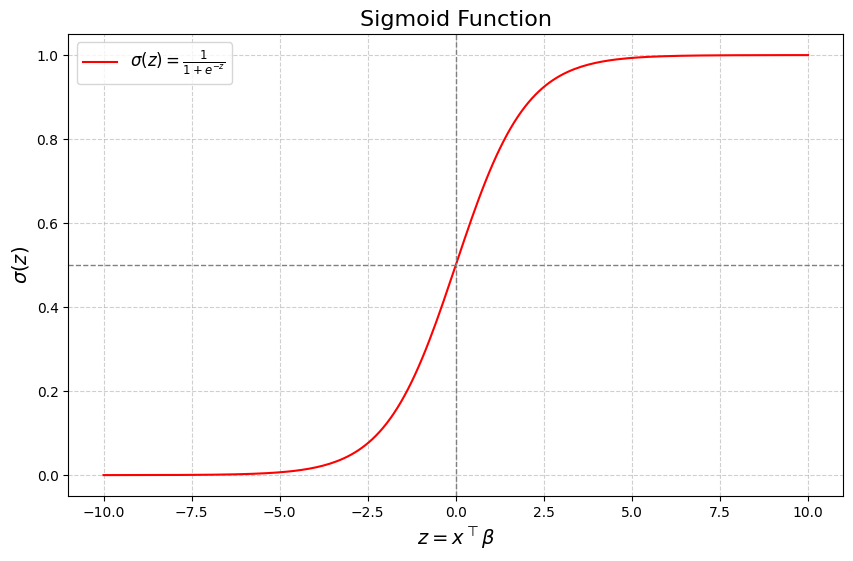

In [2]:
# Graph of sigmoid function
sigmoid_plot()

## Parameter Estimation

We want to estimate ${\pi}$ 

$$\hat{\pi} = \dfrac{e^{x^{\top} \hat{\beta}}}{1 + e^{x^{\top}\hat{\beta}}}$$  

but how do we estimate the parameter vector $\hat{\beta}$?

We use the maximum likelihood estimate which minimises the log-likelihood function so $\hat{\beta} = \hat{\beta}_{MLE}$


$\pi = P(Y = 1 |x, \beta) = F(x^{\top}\beta) = \dfrac{e^{x^{\top} \beta}}{1 + e^{x^{\top}\beta}}$

$$
P(Y = y \mid x, \beta) =
\begin{cases}
\pi & \text{,} y = 1 \\
1 - \pi & \text{,} y = 0
\end{cases} = \pi^{y} (1 - \pi)^{1-y} = F(x^{\top} \beta)^{y} (1 - F(x^{\top} \beta))^{1 - y}
$$

Recalling the regressor matrix $X = \begin{bmatrix} X_{1\rightarrow} \\ \vdots \\ X_{i\rightarrow} \\ \vdots \\ X_{n\rightarrow} \end{bmatrix} = \begin{bmatrix} x_{1}^{\top} \\ \vdots \\ x_{i}^{\top}  \\ \vdots \\ x_{n}^{\top}  \end{bmatrix}$ where $x_{i}^{\top} = [1, x_{i2}, x_{i3}, \dots, x_{ip}]$ are the values of all predictors in the *i*-th observation.  

---

## Log Likelihood

The log-likelihood function becomes

$$
L(\beta) = \prod_{i=1}^{n} \left[ F(X_i^T \beta) \right]^{y_i} \left[ 1 - F(X_i^T \beta) \right]^{1 - y_i}
$$

Where:

$$
F(X_i^T \beta) = \frac{1}{1 + e^{-X_i^T \beta}}
$$

And the log-likelihood is:

$$
\ln L(\beta) = \sum_{i=1}^{n} \left[ y_i \ln F(X_i^T \beta) + (1 - y_i) \ln (1 - F(X_i^T \beta)) \right]
$$

---

For the logistic setting the loss function is:

$$
\ell(\beta) = -\ln L(\beta)
$$

Maximum likelihood estimator (MLE):

$$
\hat{\beta}_{MLE} = \arg \max_{\beta} L(\beta)
= \arg \max_{\beta} \ln L(\beta)
= \arg \min_{\beta} \left(-\ln L(\beta)\right)
= \arg \min_{\beta} \ell(\beta)
$$

**Note**  

It can be shown that the loss function $ \ell(\beta) = -\ln L(\beta)$ is a **convex function** in $\beta$, since $\ln L(\beta)$ is concave.  

This convexity guarantees a **unique global minimum** for the optimization problem.  

---


## 📌 Logistic Regression Loss Function and Gradient

The **negative log-likelihood (loss function)** for logistic regression is:

$$
\ell(\beta) = - \sum_{i=1}^{n} \left[ y_i \ln p_i + (1 - y_i) \ln (1 - p_i) \right]
$$

Where:

- $n$ = number of observations  
- $p_i$ = predicted probability for observation $i$  
- $y_i$ = actual binary outcome (0 or 1) for observation $i$  
- $p_i = F(X_i^T \beta) = \frac{1}{1 + e^{-X_i^T \beta}}$

---

## 📌 Gradient of the Loss Function

Taking the derivative with respect to $\beta$ gives the gradient:

$$
\nabla_\beta \ell(\beta) = \sum_{i=1}^{n} (p_i - y_i) X_i
$$

Or more compactly in matrix notation:

$$
\nabla_\beta \ell(\beta) = X^T (p - y)
$$

---

## 📌 Notation:

- $X$ is an $n \times k$ matrix:  
  - $n$ = number of observations (rows)  
  - $k$ = number of predictors (columns, including an intercept if applicable)
- $p$ is an $n \times 1$ vector of predicted probabilities  
- $y$ is an $n \times 1$ vector of actual labels (0 or 1)

---

## 📌 Why It Matters:

- The gradient $\nabla_\beta \ell(\beta)$ shows how to adjust the model parameters $\beta$ to reduce the loss.
- It's used in optimization algorithms like:
  - **Gradient Descent**:
    $$
    \beta^{(t+1)} = \beta^{(t)} - \alpha \nabla_\beta \ell(\beta^{(t)})
    $$
  - **Newton-Raphson (or Iteratively Reweighted Least Squares for logistic regression)** — a second-order method using the Hessian for faster convergence.
- Minimizing this loss function finds the **maximum likelihood estimate (MLE)** of $\beta$.

---


## 📌 Hessian of the Loss Function

The **Hessian matrix** is the matrix of second derivatives of the loss function with respect to the parameters $\beta$.

For logistic regression, the Hessian is:

$$
H(\beta) = X^T W X
$$

Where:

- $W$ is an $n \times n$ diagonal matrix with entries:
  $$
  w_i = p_i (1 - p_i)
  $$

---

## 📌 Newton-Raphson (Iteratively Reweighted Least Squares) Update

Using both the gradient and the Hessian, the **Newton-Raphson update step** for $\beta$ is:

$$
\beta^{(t+1)} = \beta^{(t)} - H^{-1}(\beta^{(t)}) \nabla_\beta \ell(\beta^{(t)})
$$

In matrix form:

$$
\beta^{(t+1)} = \beta^{(t)} + (X^T W X)^{-1} X^T (y - p)
$$

---

## 📌 Why This Matters:

- The Hessian captures the **curvature** of the loss function.  
- Using it with the Newton-Raphson method allows for **faster, quadratic convergence** compared to first-order methods like gradient descent.  
- Especially useful in logistic regression where the log-likelihood is concave and has a unique maximum.  

Newton-Raphson is the basis for many statistical modeling tools (like `statsmodels`' `Logit` or `GLM` in Python) that solve logistic regression models via maximum likelihood.

---


## Summary

The logistic regression model uses the **sigmoid function** to map predicted values to probabilities:

$$
P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n)}}
$$

Where:
- $ \beta_0 $ is the intercept.
- $ \beta_i $ are the model coefficients.
- $ X_i $ are the feature values.

The loss function used is the **log loss** (binary cross-entropy):

$$
L = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(p_i) + (1-y_i) \log(1-p_i) \right]
$$


## Data Preprocessing

**When to use Standardization or Normalization:**

- Logistic Regression is sensitive to the scale of features.
- Use **Standardization** (zero mean, unit variance) if features have different units or scales.


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


## Hyperparameter Tuning

Key hyperparameters:
- `C`: Regularization strength (inverse of $ \lambda $).
- `penalty`: Regularization type (`l1`, `l2`, `elasticnet`).
- `solver`: Optimization algorithm.

Use `GridSearchCV` to find the best combination.


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


## 🔁 Cross-Validation

Use k-Fold Cross-Validation to validate model performance.


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-validated accuracy:", scores.mean())


## 📏 Evaluation Metrics

- Accuracy
- Precision
- Recall
- F1 Score
- ROC-AUC


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))


## ✅ Pros, Cons, and When to Use

**Pros:**
- Easy to implement and interpret.
- Fast to train.
- Works well for linearly separable classes.

**Cons:**
- Assumes linearity between independent variables and log-odds.
- Struggles with multicollinearity.
- Can underperform with highly complex or non-linear data.

**When to Use:**
- When you need a baseline binary classifier.
- When interpretability matters.
- When the relationship between features and the target is approximately linear.


## 📚 References

- [scikit-learn LogisticRegression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow" by Aurélien Géron
